In [1]:
import numpy as np
import matplotlib.pyplot as plt


<h1> Reading Images 

In [2]:
band_1= plt.imread('data/band1.gif').astype('double').mean(axis=2)
band_2= plt.imread('data/band2.gif').astype('double').mean(axis=2)
band_3= plt.imread('data/band3.gif').astype('double').mean(axis=2)
band_4= plt.imread('data/band4.gif').astype('double').mean(axis=2)

<h1> Getting Pixel_Values

In [3]:
band_1_pixels=band_1.flatten()
band_2_pixels=band_2.flatten()
band_3_pixels=band_3.flatten()
band_4_pixels=band_4.flatten()

In [4]:
datapoints=np.stack((band_1_pixels,band_2_pixels,band_3_pixels,band_4_pixels),axis=-1)
# datapoints.shape

<h1> K-Means Clustering

In [5]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def k_means_clustering(X, k, max_iters=200):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    
    for c in range(max_iters):
        clusters = [[] for c in range(k)]
        for i, x in enumerate(X):
            distances = [euclidean_distance(x, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(i)
        
        new_centroids = np.array([np.mean(X[cluster], axis=0) for cluster in clusters])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids


<h1> For different K Values 

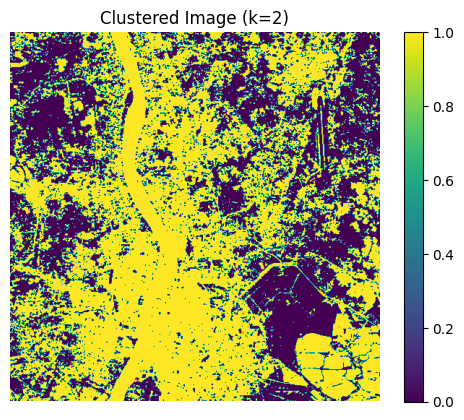

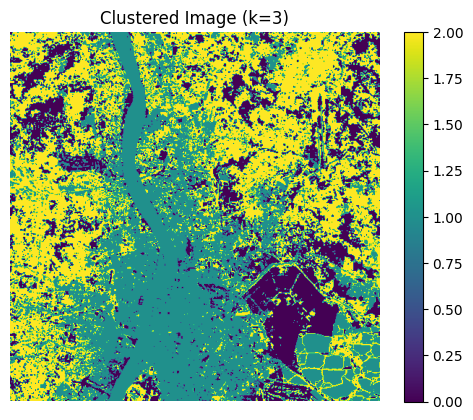

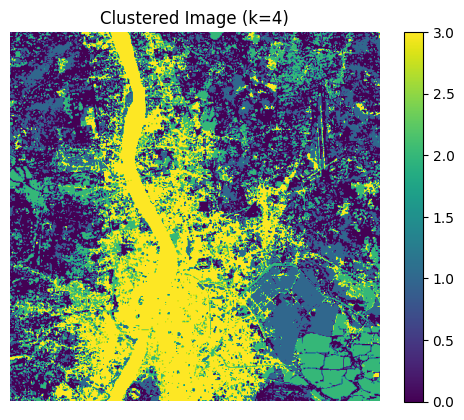

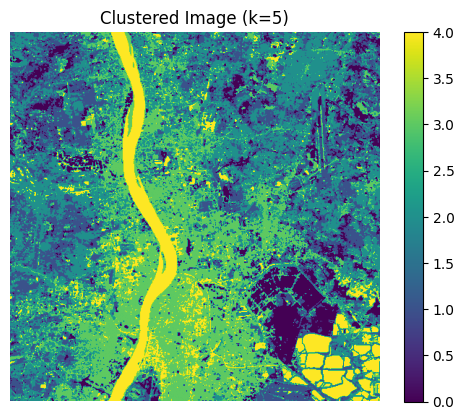

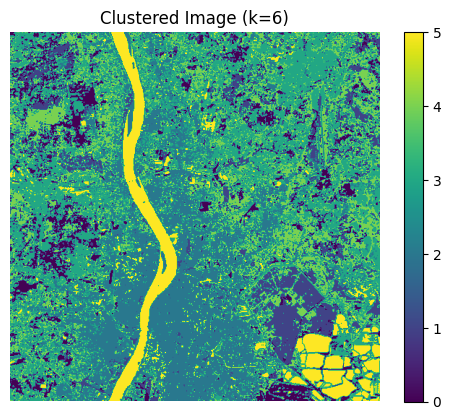

In [6]:

k_values = [2, 3, 4, 5, 6]
for k in k_values:
    labels,c = k_means_clustering(datapoints, k)

    
    clustered_labels = np.zeros_like(band_1)
    
    for i, cluster in enumerate(labels):
        clustered_labels.flat[cluster] = i
    
    plt.figure()
    # plt.imshow(clustered_labels, cmap='jet')
    plt.imshow(clustered_labels, cmap='viridis')
    plt.colorbar()
    plt.title(f'Clustered Image (k={k})')
    plt.axis('off')
    plt.show()
